<a href="https://colab.research.google.com/github/revv2703/Fashion-GAN/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist',split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteW9FASY/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteW9FASY/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
# ds.as_numpy_iterator().next()
# ds.as_numpy_iterator().next().keys()
ds.as_numpy_iterator().next()['label']

2

In [6]:
import numpy as np

data_iterator = ds.as_numpy_iterator()
data_iterator.next()    #to init new element i.e. image

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [7]:
np.squeeze(data_iterator.next()['image']).shape
data_iterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

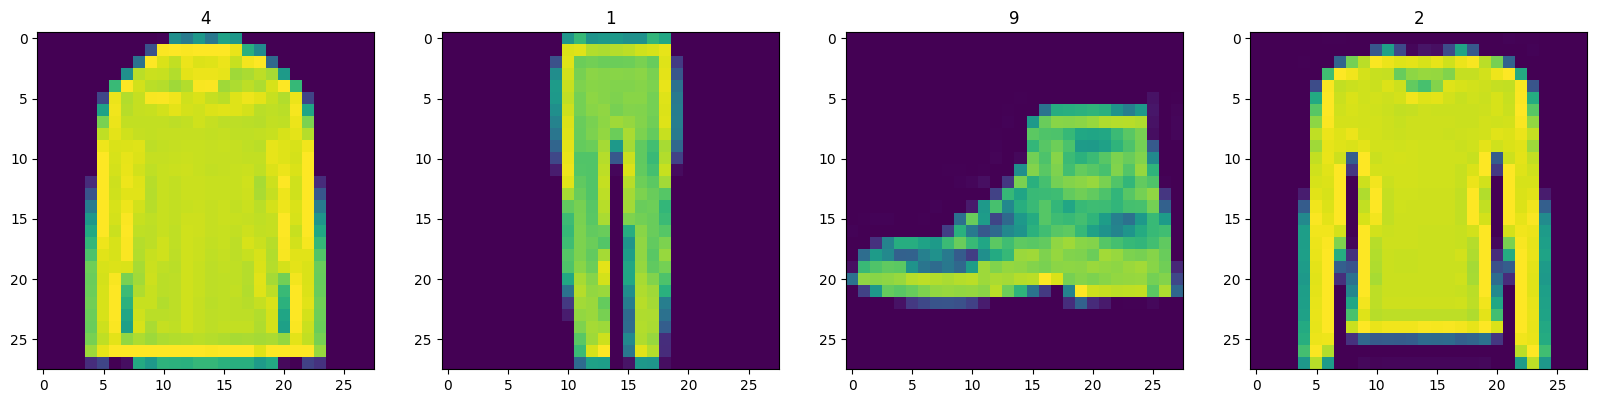

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx in range(4):
    batch = data_iterator.next()
    ax[idx].imshow(np.squeeze(batch['image']))
    ax[idx].title.set_text(batch['label'])

In [7]:
def scale_images(data):
    # image = data['image']
    # return image /255
    return data['image']/255

In [8]:
ds = tfds.load('fashion_mnist',split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [9]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [11]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))


    return model

In [12]:
gen = build_generator()
gen.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 2s 2s/step


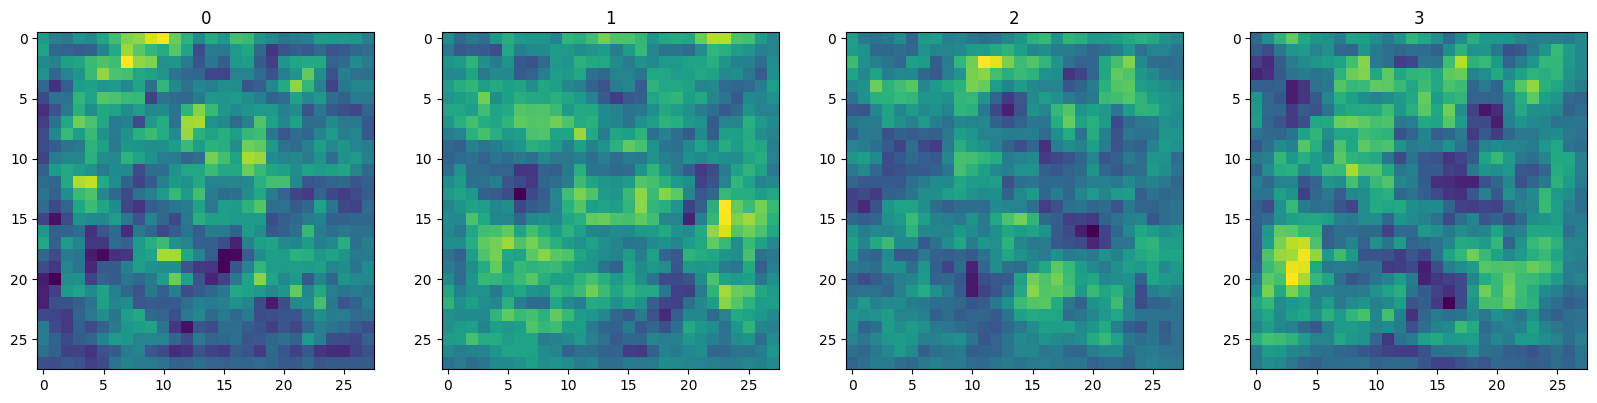

In [13]:
img = gen.predict(np.random.randn(4, 128, 1))

fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(img):
    ax[idx].imshow(img)
    ax[idx].title.set_text(idx)

In [14]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))


    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))


    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))


    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))

    return model

In [15]:
discrim = build_discriminator()

In [16]:
discrim.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [17]:
img = gen.predict(np.random.randn(4, 128, 1))
discrim.predict(img)
# line 2 will give error if img var not initialized again because the function expects the first element of the input to be the batch number, to solve that:
# discrim.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 318ms/step


array([[0.50638187],
       [0.5064309 ],
       [0.5064821 ],
       [0.50649166]], dtype=float32)

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [19]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [20]:
from tensorflow.keras.models import Model

In [21]:
tf.random.normal((6, 128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[-1.06380320e+00],
        [ 3.67187351e-01],
        [-8.53964150e-01],
        [ 1.97448468e+00],
        [-1.86393046e+00],
        [ 3.14659506e-01],
        [-1.91495728e+00],
        [-6.05353594e-01],
        [ 1.11658502e+00],
        [-9.20062780e-01],
        [ 7.59108663e-01],
        [ 6.58499539e-01],
        [ 3.86817127e-01],
        [ 6.92766011e-02],
        [-2.93398947e-01],
        [ 4.01857108e-01],
        [ 5.54356635e-01],
        [ 7.95622647e-01],
        [-1.06854364e-01],
        [-1.52013159e+00],
        [ 4.86651361e-02],
        [-3.17329645e-01],
        [ 9.65054095e-01],
        [-1.04292703e+00],
        [ 7.11359978e-01],
        [-1.76412380e+00],
        [ 1.84573352e+00],
        [ 4.27893728e-01],
        [ 2.24057019e-01],
        [ 2.79243559e-01],
        [-1.78953022e-01],
        [ 5.45129180e-01],
        [-5.67371905e-01],
        [ 1.02928400e+00],
        [-8.54548275e-01],
  

In [22]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args, **kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128, 128, 1)), training = False)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images, training = True)
      yhat_fake = self.discriminator(fake_images, training = True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    d_grad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))


    with tf.GradientTape() as g_tape:
      gen_img = self.generator(tf.random.normal((128, 128, 1)), training = True)

      predicted_labels = self.discriminator(gen_img, training = False)

      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    g_grad = g_tape.gradient(total_g_loss, self.discriminator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad, self.discriminator.trainable_variables))

    return {"d_loss":total_d_loss, "g_loss": total_g_loss}



In [23]:
fashGAN = FashionGAN(gen, discrim)

In [24]:
fashGAN.compile(g_opt, d_opt, g_loss, d_loss)

In [25]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [26]:
class ModelMonitor(Callback):
  def __init__(self, num_img = 3, latent_dim = 128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs = None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
    gen_img = self.model.generator(random_latent_vectors)
    gen_img *= 255
    gen_img.numpy()
    for i in range(self.num_img):
      img = array_to_img(gen_img[i])
      img.save(os.path.join("generated images", f'generated_img_{epoch}_{i}.png'))

In [27]:
ds.as_numpy_iterator().next()

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.13725491],
         [0.1764706 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [29]:
hist = fashGAN.fit(ds, epochs = 20, callbacks = [ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 55s 118ms/step - d_loss: 5.7398 - g_loss: 3.4680e-06
Epoch 2/20
469/469 [==============================] - 56s 119ms/step - d_loss: 7.7163 - g_loss: 0.0000e+00
Epoch 3/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7170 - g_loss: 0.0000e+00
Epoch 4/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7166 - g_loss: 0.0000e+00
Epoch 5/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7177 - g_loss: 0.0000e+00
Epoch 6/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7172 - g_loss: 0.0000e+00
Epoch 7/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7162 - g_loss: 0.0000e+00
Epoch 8/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7176 - g_loss: 0.0000e+00
Epoch 9/20
469/469 [==============================] - 57s 121ms/step - d_loss: 7.7189 - g_loss: 0.0000e+00
Epoch 10/20
469/469 [================

In [31]:
hist.history

{'d_loss': [8.638351440429688,
  8.621102333068848,
  8.68547248840332,
  8.657835006713867,
  8.59394645690918,
  8.663213729858398,
  8.665804862976074,
  8.598871231079102,
  8.484405517578125,
  8.642379760742188,
  8.597403526306152,
  8.694513320922852,
  8.665579795837402,
  8.706402778625488,
  8.678071022033691,
  8.598485946655273,
  8.615407943725586,
  8.679590225219727,
  8.619275093078613,
  8.68200397491455],
 'g_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

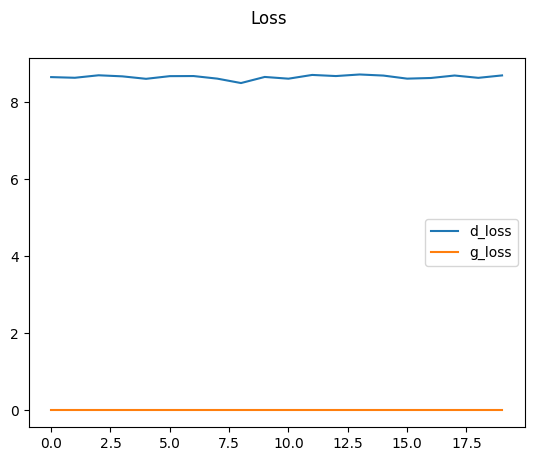

In [32]:
plt.suptitle("Loss")
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()

In [38]:
#Generate images
imgs = gen.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 33ms/step


IndexError: index 16 is out of bounds for axis 0 with size 16

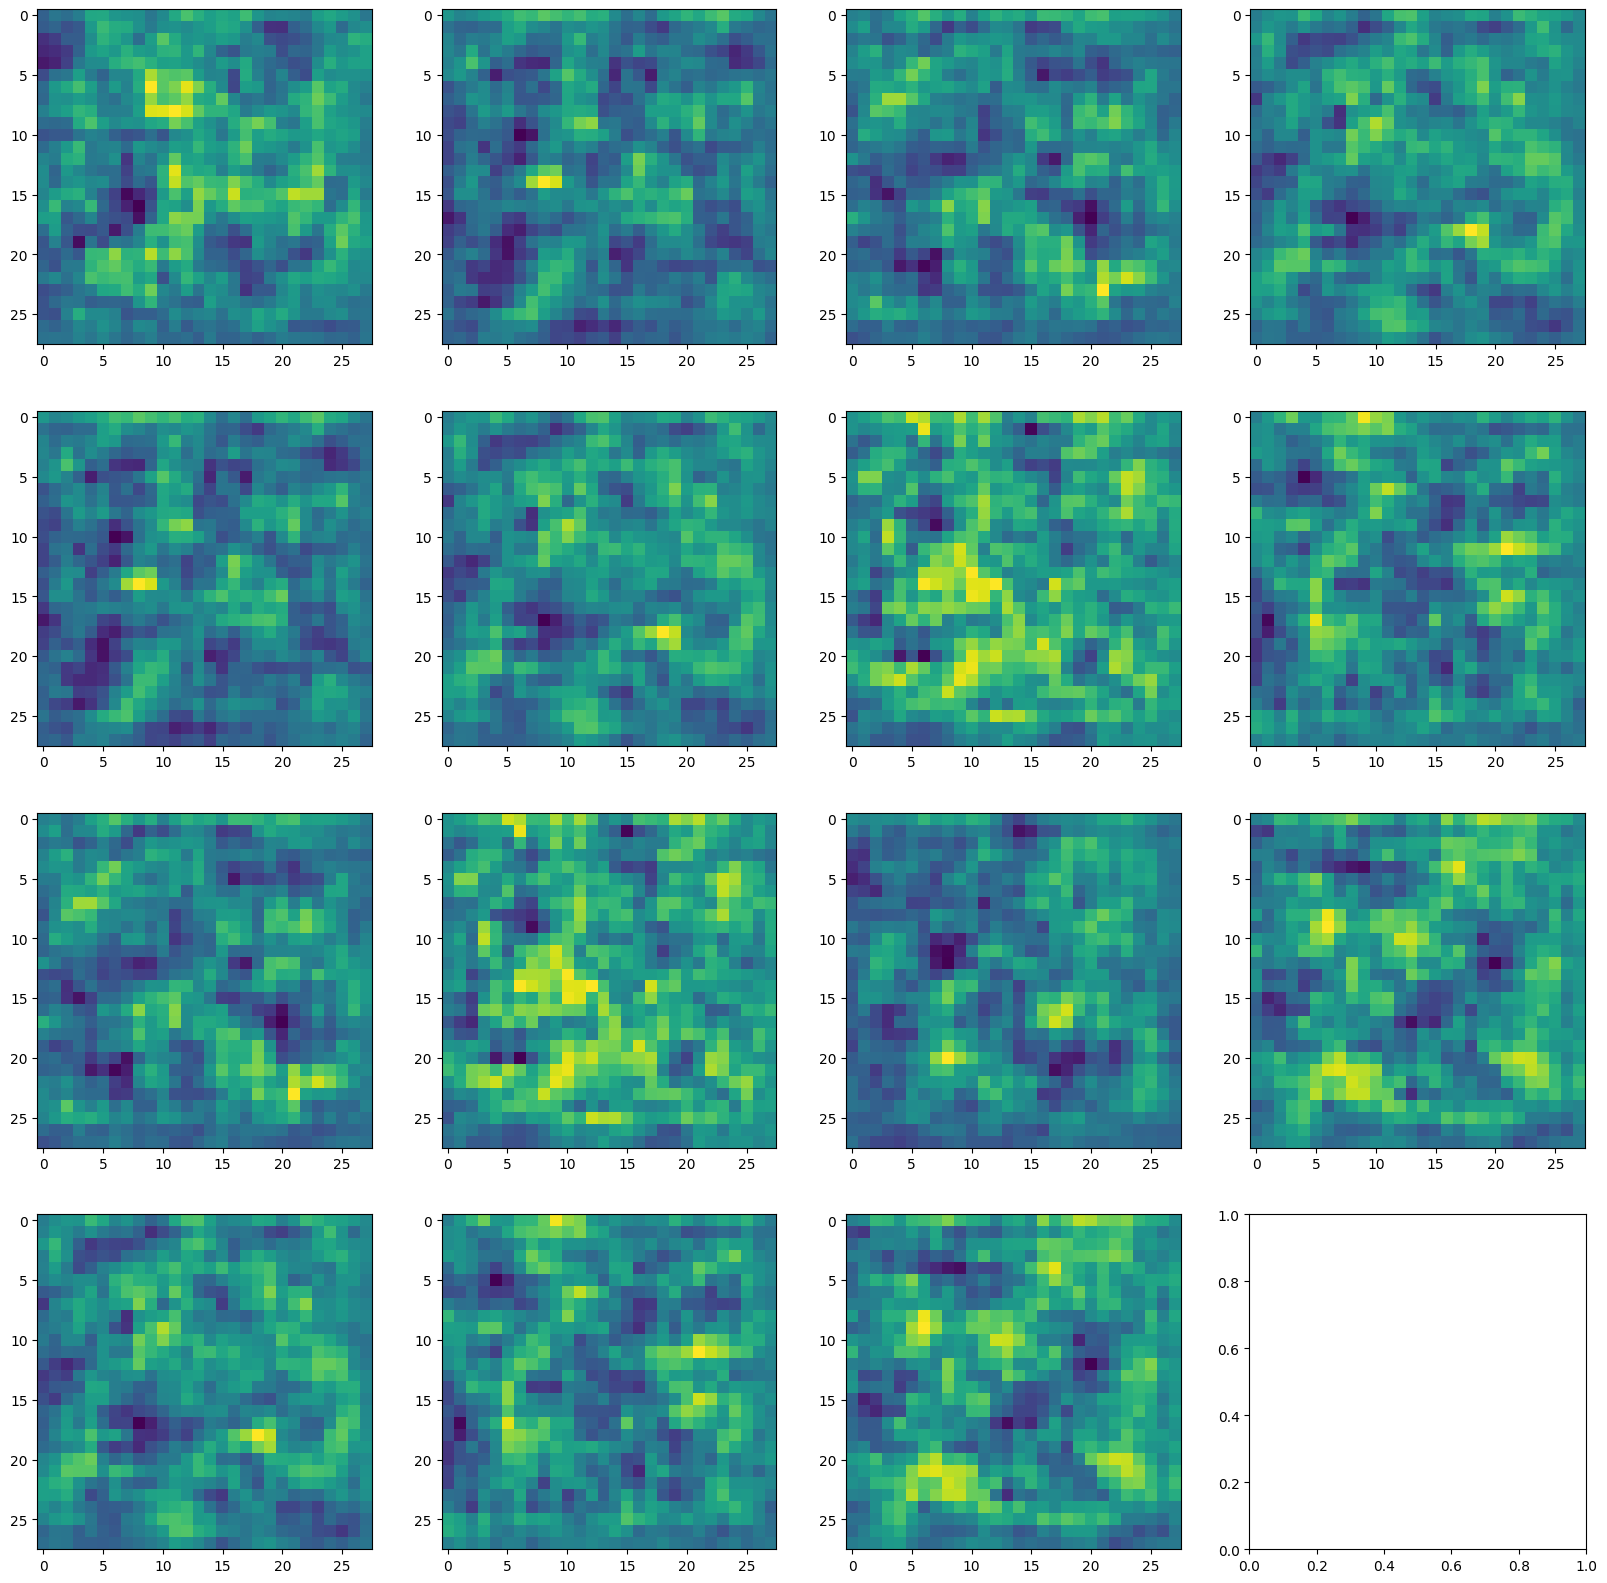

In [39]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
for r in range(4):
  for c in range(4):
    ax[c][r].imshow(imgs[(r+1)*(c+1)-1])

In [1]:
gen.save("generator.h5")
discrim.save("discriminator.h5")

NameError: name 'gen' is not defined